# Регрессия на примере предсказания количества осадков на следующий день

Загружаем датасет, удаляем все города, кроме Канберры, удаляем категориальные и бинарные признаки, удаляем nan записи.

In [9]:
import pandas

data = pandas.read_csv('weatherAUS.csv')
data = data[data['Location'] == 'Canberra']
non_cat_df = data.drop(columns=['Date', 'Location', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am',
                     'WindDir3pm','Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'])
non_cat_df = non_cat_df.dropna()
non_cat_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
45587,8.0,24.3,0.0,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,14.4,23.6,3.6
45588,14.0,26.9,3.6,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,17.5,25.7,3.6
45589,13.7,23.4,3.6,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,15.4,20.2,39.8
45590,13.3,15.5,39.8,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,13.5,14.1,2.8
45591,7.6,16.1,2.8,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,11.1,15.4,0.0


## Корреляционная матрица признаков и взаимосвязь с целевой переменной

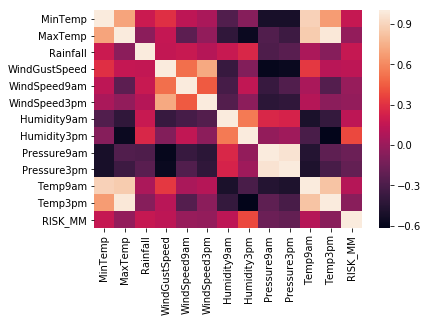

In [10]:
import seaborn as sns
%matplotlib inline

corr = non_cat_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

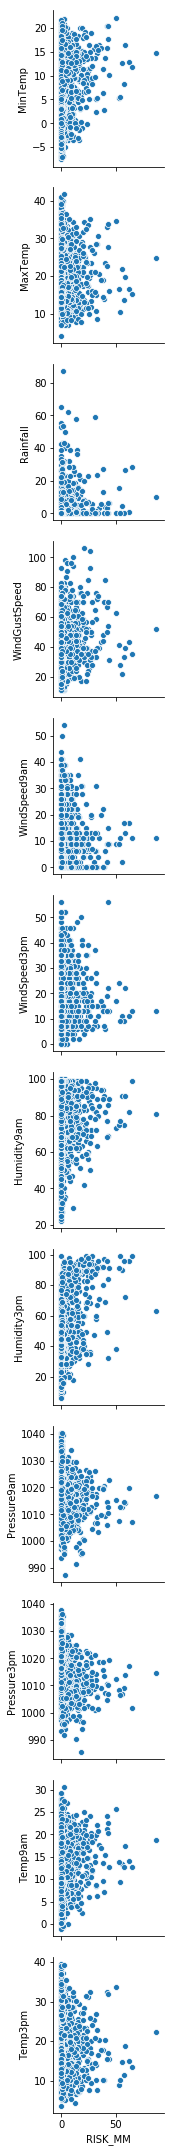

In [11]:
pp = sns.pairplot(data=non_cat_df,
                  x_vars=['RISK_MM'],
                  y_vars=non_cat_df.columns.values[:-1])

In [4]:
import sklearn.model_selection as ms
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pylab as plt

X_train, X_test, y_train, y_test = ms.train_test_split(non_cat_df.drop(columns=['RISK_MM']), non_cat_df['RISK_MM'])


def print_mxe(clf):
    mae = (mean_absolute_error(y_train, clf.predict(X_train)), mean_absolute_error(y_test, clf.predict(X_test)))
    print("mae train {0} test {1}".format(mae[0],
                                  mae[1]))
    mse = (mean_squared_error(y_train, clf.predict(X_train)), mean_squared_error(y_test, clf.predict(X_test)))
    print("mse train {0} test {1}".format(mse[0],
                                  mse[1]))
    return (mae, mse)


def print_errors(clf):
    mae, mse = print_mxe(clf)
    print('interception {0} \ncoefs {1}'.format(clf.intercept_, clf.coef_))
    n_features = len(clf.coef_)
    plt.barh(range(n_features), clf.coef_, align='center')
    plt.yticks(range(n_features), X_train.keys())
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    return (mae, mse)

## Регрессия на вещественных признаках

Простая линейная регрессия

mae train 2.607449656897395 test 2.535456726433332
mse train 25.279887280226834 test 20.600634803890387
interception 80.91023407757918 
coefs [-0.01931804  0.07212384  0.07818718  0.13737729 -0.11822174 -0.15185887
 -0.02857247  0.16038509  0.52760619 -0.61406306  0.17446111 -0.16063382]


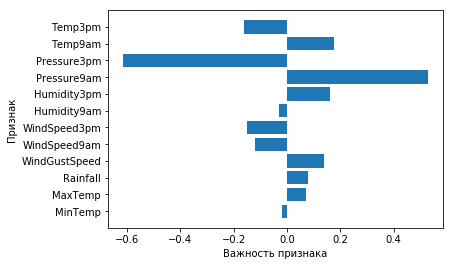

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lg_m = print_errors(lin_reg)

Лассо

{'alpha': 1}
mae train 2.5629874401043673 test 2.480917533382779
mse train 26.087943277159276 test 20.96520233718037
interception 80.65936890313483 
coefs [ 0.          0.03479941  0.02233588  0.11991148 -0.12125844 -0.11125177
 -0.01652393  0.16457677  0.         -0.08653951  0.03959992  0.        ]


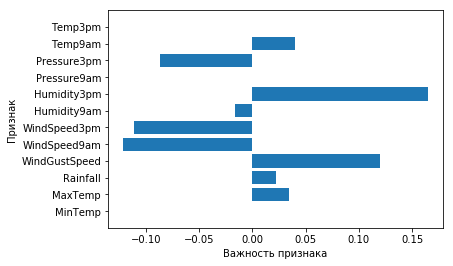

In [13]:
from sklearn.model_selection import GridSearchCV
import numpy 
from sklearn.linear_model import Lasso

parameters = {'alpha': numpy.arange(1,10,1)}
lasso = Lasso()
gridLasso = GridSearchCV(lasso, parameters, cv=5)
gridLasso.fit(X_train, y_train)

lasso = gridLasso.best_estimator_
lasso.fit(X_train, y_train)
print(gridLasso.best_params_)
ls_m = print_errors(lasso)

Ридж

{'alpha': 19}
mae train 2.6066886587520157 test 2.5345360072609204
mse train 25.279938985224042 test 20.597905609569082
interception 80.86456099382642 
coefs [-0.0196031   0.07011708  0.07797077  0.13745887 -0.11841253 -0.15177379
 -0.02864815  0.16069687  0.52299348 -0.60941813  0.173239   -0.15684185]


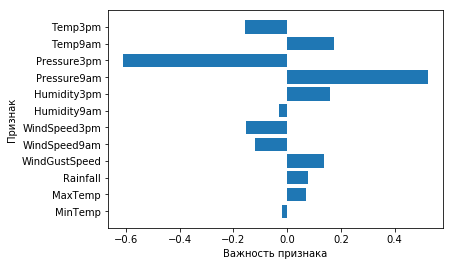

In [14]:
from sklearn.linear_model import Ridge

parameters = {'alpha': numpy.arange(1,20,1)}
ridge = Ridge()
gridRidge = GridSearchCV(ridge, parameters, cv=5)
gridRidge.fit(X_train, y_train)
print(gridRidge.best_params_)

ridge = gridRidge.best_estimator_
rd_m = print_errors(ridge)

Эластикнет

D:\Мои файлы\Программы\python\data_analyse_labs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Мои файлы\Программы\python\data_analyse_labs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Мои файлы\Программы\python\data_analyse_labs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Мои файлы\Программы\python\data_analyse_labs\venv\lib\site-packages\sklearn\

D:\Мои файлы\Программы\python\data_analyse_labs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Мои файлы\Программы\python\data_analyse_labs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Мои файлы\Программы\python\data_analyse_labs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Мои файлы\Программы\python\data_analyse_labs\venv\lib\site-packages\sklearn\

{'alpha': 1000.0, 'l1_ratio': 0.0}
mae train 2.6066886587520157 test 2.5345360072609204
mse train 25.279938985224042 test 20.597905609569082
interception 80.86456099382642 
coefs [-0.0196031   0.07011708  0.07797077  0.13745887 -0.11841253 -0.15177379
 -0.02864815  0.16069687  0.52299348 -0.60941813  0.173239   -0.15684185]


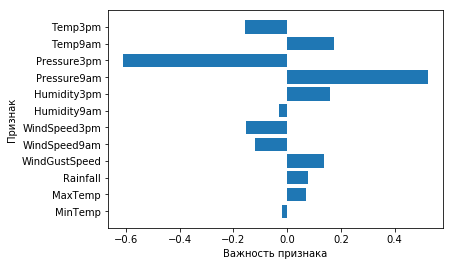

In [15]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha': numpy.arange(0,1e4,1000)[1:], 'l1_ratio': numpy.arange(0,1,0.1)}
elnet = ElasticNet()
gridElasticNet = GridSearchCV(elnet, parameters, cv=5)
gridElasticNet.fit(X_train, y_train)
print(gridElasticNet.best_params_)

elnet = gridRidge.best_estimator_
rd_m = print_errors(elnet)

## Возвращаем категориальные и бинарные признаки

In [16]:
import pandas

cat_data = data.drop(columns=['Date', 'Location', 'RainTomorrow'])
cat_data = cat_data.dropna()
df = pandas.get_dummies(cat_data, columns=['Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am', 
                                           'WindDir3pm','Cloud9am', 'Cloud3pm'], drop_first=True)
df['RainToday'] = (df['RainToday'] == 'Yes')*1
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Cloud9am_7.0,Cloud9am_8.0,Cloud3pm_1.0,Cloud3pm_2.0,Cloud3pm_3.0,Cloud3pm_4.0,Cloud3pm_5.0,Cloud3pm_6.0,Cloud3pm_7.0,Cloud3pm_8.0
45587,8.0,24.3,0.0,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,...,1,0,0,0,0,0,0,0,1,0
45588,14.0,26.9,3.6,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,...,0,0,0,0,1,0,0,0,0,0
45589,13.7,23.4,3.6,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,...,0,1,0,0,0,0,0,0,1,0
45590,13.3,15.5,39.8,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,...,0,0,0,0,0,0,0,0,1,0
45591,7.6,16.1,2.8,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,...,1,0,0,0,0,0,0,0,1,0


Простая линейная регрессия

In [17]:
X_train, X_test, y_train, y_test = ms.train_test_split(df.drop(columns=['RISK_MM']), df['RISK_MM'])
lin_reg.fit(X_train, y_train)
print_mxe(lin_reg)

mae train 2.426595511697762 test 5922659442.261791
mse train 16.230104189935048 test 6.231966675104145e+21


((2.426595511697762, 5922659442.261791),
 (16.230104189935048, 6.231966675104145e+21))

Лассо

In [18]:
lasso.fit(X_train, y_train)
mae = (mean_absolute_error(y_train, lasso.predict(X_train)), mean_absolute_error(y_test, lasso.predict(X_test)))
print_mxe(lasso)

mae train 2.7242951994230893 test 2.9125538429730096
mse train 31.671533257720753 test 36.21721853715847


((2.7242951994230893, 2.9125538429730096),
 (31.671533257720753, 36.21721853715847))

Ридж

In [19]:
ridge.fit(X_train, y_train)
print_mxe(ridge)

mae train 2.5535175950939606 test 3.209712259485462
mse train 24.878530740003722 test 36.15658382897983


((2.5535175950939606, 3.209712259485462),
 (24.878530740003722, 36.15658382897983))

ЭластикНет

In [20]:
elnet.fit(X_train, y_train)
print_mxe(elnet)

mae train 2.5535175950939606 test 3.209712259485462
mse train 24.878530740003722 test 36.15658382897983


((2.5535175950939606, 3.209712259485462),
 (24.878530740003722, 36.15658382897983))

## Нормирование вещественных признаков

In [21]:
import sklearn.preprocessing as preprocess

scalerdf = df
scaler = preprocess.StandardScaler()
scaler.fit_transform(scalerdf[['MinTemp', 'MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                        'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
scalerdf[['MinTemp', 'MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
    'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']] = scaler.transform(scalerdf[['MinTemp', 'MaxTemp','Rainfall',
                                                                                                         'WindGustSpeed','WindSpeed9am',
                                                                                                         'WindSpeed3pm','Humidity9am',
                                                                                                         'Humidity3pm','Pressure9am',
                                                                                                         'Pressure3pm','Temp9am','Temp3pm']])
scalerdf.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Cloud9am_7.0,Cloud9am_8.0,Cloud3pm_1.0,Cloud3pm_2.0,Cloud3pm_3.0,Cloud3pm_4.0,Cloud3pm_5.0,Cloud3pm_6.0,Cloud3pm_7.0,Cloud3pm_8.0
45587,0.046619,0.601417,-0.345298,-0.763536,-0.637604,0.171446,-0.358289,-1.032897,0.181517,-0.108499,...,1,0,0,0,0,0,0,0,1,0
45588,1.074335,0.998676,0.306564,-0.106988,-0.886775,-0.161561,0.523528,-0.634357,-0.809073,-1.048064,...,0,0,0,0,1,0,0,0,0,0
45589,1.022949,0.463904,0.306564,3.248699,-0.637604,-1.382585,0.670497,1.244473,-1.202595,-1.218894,...,0,1,0,0,0,0,0,0,1,0
45590,0.954435,-0.743154,6.861392,0.987257,2.352444,0.615455,-0.799198,0.504328,-1.745384,-1.247365,...,0,0,0,0,0,0,0,0,1,0
45591,-0.021895,-0.651478,0.161706,0.695459,1.106590,1.059464,-0.358289,0.105788,-0.008459,0.389755,...,1,0,0,0,0,0,0,0,1,0


Простая линейная 

In [22]:
X_train, X_test, y_train, y_test = ms.train_test_split(scalerdf.drop(columns=['RISK_MM']), scalerdf['RISK_MM'])
lin_reg.fit(X_train, y_train)
print_mxe(lin_reg)

mae train 2.354137429029884 test 90701114199.93066
mse train 15.747296799269288 test 1.8563446289941486e+24


((2.354137429029884, 90701114199.93066),
 (15.747296799269288, 1.8563446289941486e+24))

Лассо

In [23]:
lasso.fit(X_train, y_train)
mae = (mean_absolute_error(y_train, lasso.predict(X_train)), mean_absolute_error(y_test, lasso.predict(X_test)))
print_mxe(lasso)

mae train 2.6678624790471552 test 3.1297295143227326
mse train 34.10745860043933 test 49.34240942374323


((2.6678624790471552, 3.1297295143227326),
 (34.10745860043933, 49.34240942374323))

Ридж

In [24]:
ridge.fit(X_train, y_train)
print_mxe(ridge)

mae train 2.520722101797683 test 3.2021148868926534
mse train 24.098732675149375 test 39.78735778524975


((2.520722101797683, 3.2021148868926534),
 (24.098732675149375, 39.78735778524975))

ЭластикНет

In [25]:
elnet.fit(X_train, y_train)
print_mxe(elnet)

mae train 2.520722101797683 test 3.2021148868926534
mse train 24.098732675149375 test 39.78735778524975


((2.520722101797683, 3.2021148868926534),
 (24.098732675149375, 39.78735778524975))

Наилучше всего себя показала модель Лассо

In [26]:
print('interception {0} \ncoefs {1}'.format(lasso.intercept_, lasso.coef_))

interception 1.936303919105734 
coefs [ 0.31716575  0.          0.          0.07226443 -0.          0.
  0.          0.9940705  -0.         -0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.

Text(0, 0.5, 'Признак')

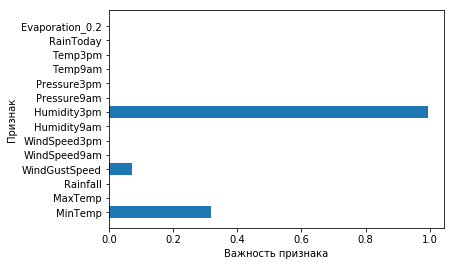

In [27]:
# from matplotlib import rcParams

# rcParams['figure.figsize'] = (10, 6)
# rcParams['figure.dpi'] = 150

n_features = len(lasso.coef_[:14])
plt.barh(range(n_features), lasso.coef_[:14], align='center')
plt.yticks(range(n_features), X_train.keys()[:14])
plt.xlabel("Важность признака")
plt.ylabel("Признак")